# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [13]:
whs = pd.read_csv('happiness_score.csv')
whs

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [14]:
whs.shape

(158, 12)

## By looking at the dataset we can see that our target variable is to predict happiness score
#### key observations-: 
   1. target variable -: happiness score
   
   
   
        type of variable-: continous variable
        
        type of problem-: linear regrssion (as the variable values are continous in nature) 
        
        
        
   2. features-: all the variables except happiness score
   
   
   
        type of variables-: continous variables

### Re-indexing and Dropping the unnecessary columns

In [17]:
whs = whs.drop(columns = ['Country','Region'],axis = 1)
whs.head(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [18]:
whs = whs.set_index('Happiness Rank')
whs.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [19]:
whs.shape

(158, 9)

In [20]:
whs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 12.3 KB


##### we can see that there are no null values present in the dataset and all the values are of float/continous type


## EDA

### Univariate and Multivariate analysis

In [21]:
whs.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [27]:
whs.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

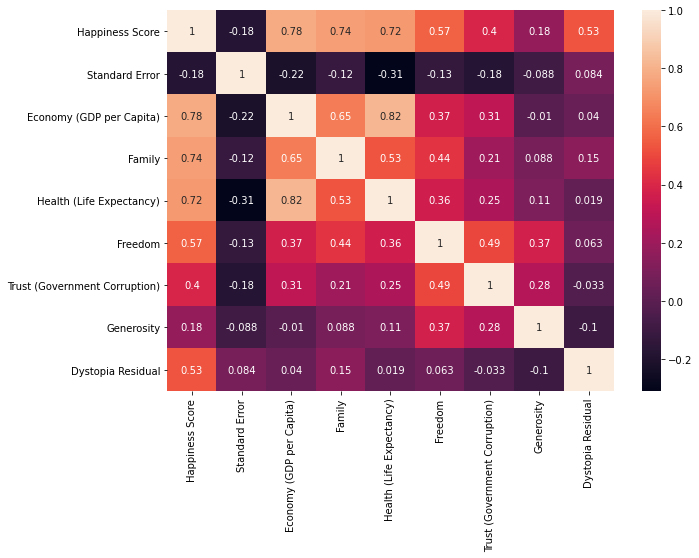

In [29]:
plt.figure(figsize = (10,7))
sns.heatmap(whs.corr(), annot = True)

### we can see that the Standard Error has negative correlation with all the columns and with Dystopia Residual its have neutral Correlation

<AxesSubplot:>

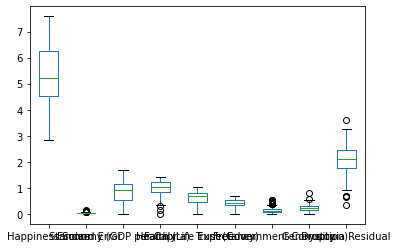

In [23]:
whs.plot.box()

### we can see that there are outliers present in the dataset in 2nd, 4th, 7th, 8th, and 9th columns
### lets check this one-by-one and confirm the same

## Checking for Outliers

In [31]:
whs.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

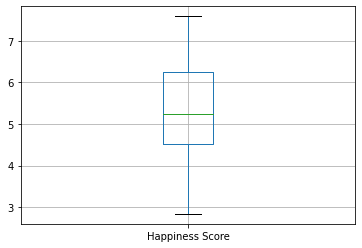

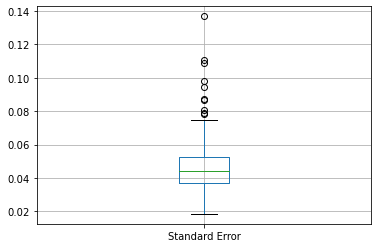

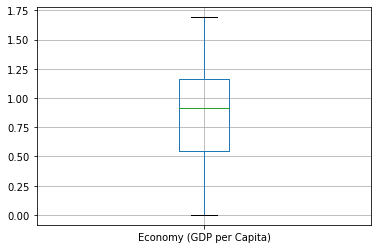

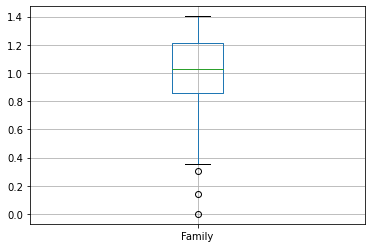

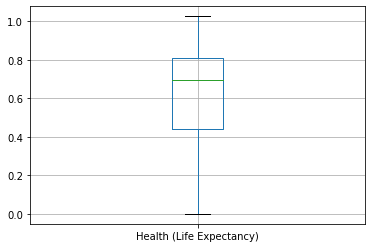

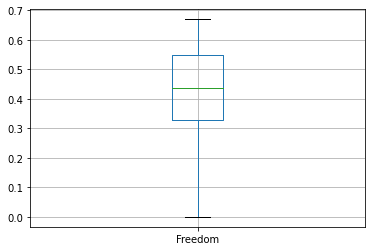

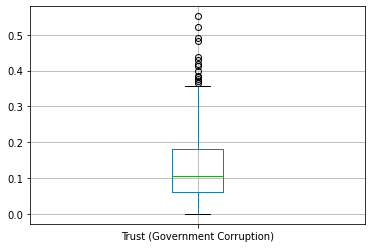

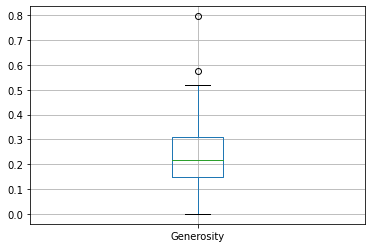

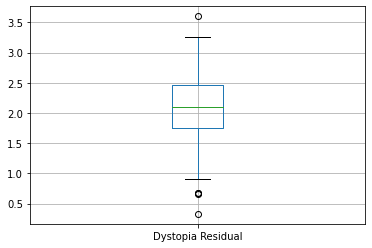

In [40]:
for column in whs:
    plt.figure()
    whs.boxplot([column])

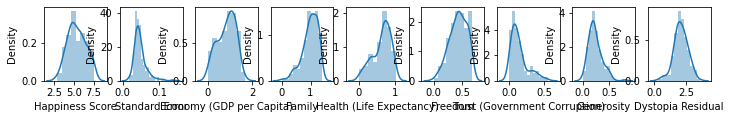

In [46]:
import warnings
warnings.filterwarnings('ignore')

collist = whs.columns.values
ncol=12
nrows=10

plt.figure(figsize = (16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(whs[collist[i]])

### Removing Outliers

In [49]:
from scipy.stats import zscore
z = np.abs(zscore(whs))
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [50]:
threshold = 3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [52]:
z[27][6]

3.1646194851713774

In [53]:
z[115][1]

3.673991869431451

In [54]:
whs_new = whs[(z<3).all(axis=1)]

In [55]:
whs_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


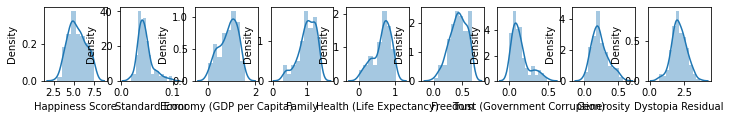

In [56]:
collist = whs_new.columns.values
ncol=12
nrows=10

plt.figure(figsize = (16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(whs_new[collist[i]])

In [57]:
whs_new.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

NOTE-:

1.If skewness is less than -1 or greater than 1, the distribution is highly skewed.



2.If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.



3.If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

<AxesSubplot:ylabel='Frequency'>

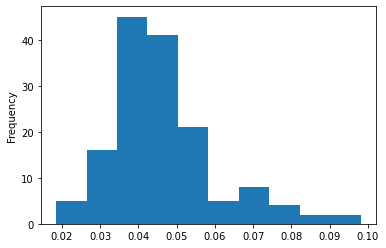

In [67]:
whs_new['Standard Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

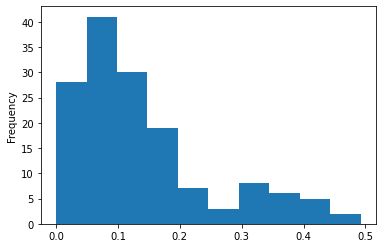

In [68]:
whs_new['Trust (Government Corruption)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

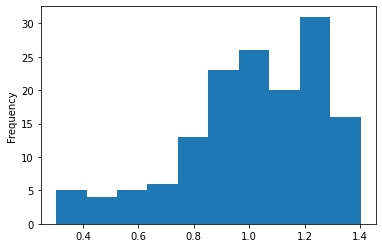

In [69]:
whs_new['Family'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

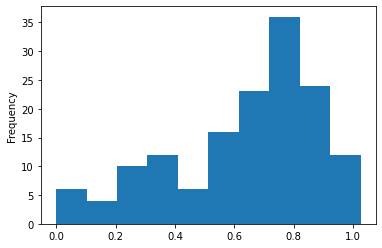

In [70]:
whs_new['Health (Life Expectancy)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

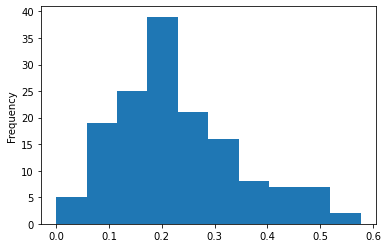

In [71]:
whs_new['Generosity'].plot.hist()

In [74]:
Standard_Error = np.log(whs_new['Standard Error'])
Standard_Error.skew()

0.12322043132563748

In [84]:
trust = np.sqrt(whs_new['Trust (Government Corruption)'])
trust.skew()

0.437253236061777

In [99]:
whs_new.head(3)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [100]:
whs_new['Standard Error'] = Standard_Error
whs_new.head(3)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [102]:
whs_new['Trust (Government Corruption)'] = trust
whs_new.head(3)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.647904,0.29678,2.51738
2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.376098,0.43630,2.70201
3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.695392,0.34139,2.49204


all changes has been made 

<AxesSubplot:>

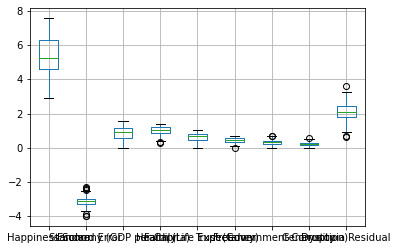

In [104]:
whs_new.boxplot()

# Model building

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [106]:
from sklearn.model_selection import train_test_split

In [112]:
x = whs_new.iloc[:,1:]
x.head(3)

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,
1,-3.378165,1.39651,1.34951,0.94143,0.66557,0.647904,0.29678,2.51738
2,-3.019206,1.30232,1.40223,0.94784,0.62877,0.376098,0.43630,2.70201
3,-3.402799,1.32548,1.36058,0.87464,0.64938,0.695392,0.34139,2.49204


In [111]:
y = whs_new.iloc[:,0:1]
y.head(3)

,Happiness Score
Happiness Rank,
1,7.587
2,7.561
3,7.527


In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .33, random_state = 45)

In [114]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [115]:
lm.score(x_train, y_train)

0.9995364969044878

In [117]:
pred = lm.predict(x_test)
print('Predicted result price:',pred)
print('actual price:',y_test)

Predicted result price: [[7.55383993]
 [6.01740912]
 [4.16252761]
 [7.51190612]
 [6.35059879]
 [6.00850523]
 [6.27490422]
 [4.55681856]
 [4.33414425]
 [3.82088208]
 [6.59053581]
 [3.9542505 ]
 [4.59177542]
 [4.80268652]
 [3.99538849]
 [6.34396544]
 [3.65984837]
 [3.68378286]
 [6.13509743]
 [4.99695892]
 [5.05429441]
 [5.11069286]
 [4.52163275]
 [5.87512344]
 [7.43224081]
 [4.61013039]
 [4.96258328]
 [5.6203738 ]
 [7.31045234]
 [4.96156208]
 [5.23881942]
 [4.74648496]
 [3.91717205]
 [4.77715147]
 [6.7950552 ]
 [3.91540446]
 [7.20362875]
 [6.69642586]
 [5.2593    ]
 [6.4960777 ]
 [6.40538459]
 [5.05501207]
 [7.59903407]
 [5.84758302]
 [4.85895343]
 [6.84319134]
 [4.07814665]
 [5.72218663]
 [4.66083294]
 [6.31416451]]
actual price:                 Happiness Score
Happiness Rank                 
1                         7.587
46                        5.987
134                       4.218
4                         7.522
36                        6.329
47                        5.984
40   

In [119]:
# checking errors

In [120]:
print('error:')


print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score:',r2_score(y_test,pred))
print('Root mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.020362711872084178
Mean squared error: 0.0007746370661069862
r2 score: 0.9994088543139057
Root mean Squared Error:  0.027832302565669736


In [123]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lm, x, y, cv = 5)
print(cv)
print('cross_val_score mean is:', cv.mean())

[0.97706391 0.9908763  0.97722914 0.97839607 0.99689294]
cross_val_score mean is: 0.9840916716711053


Observation-: 

    1. there are almost no errors or equivalent to zero
        
    2. our cv mean is also good and therefore the linear regression works better for the dataset

## Saving the Model

In [126]:
import joblib
joblib.dump(lm,'lmwhsfile.obj')

['lmwhsfile.obj']